# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Importing Dataset

In [3]:
startup_data=pd.read_csv('50_Startups.csv')
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Initial Analysis

In [4]:
startup_data.shape

(50, 5)

In [5]:
startup_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startup_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [16]:
startup_data.describe()

,RDS,ADMT,MKSD,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


# Data Preparation / Data Preprocessing
###    Data Transformation 
###### In our data state feature is descrete so we are performng
         * Label Encoder
         * One-Hot Encoder

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
startup_data['State'] = le.fit_transform(startup_data['State'])

In [13]:
startup_data.head()

,RDS,ADMT,MKSD,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [20]:
# Here we are renaming some columns name because we see some characters which gives error for our model....
startup_data=startup_data.rename({'R&D Spend':'RDS','Administration':'ADMT','Marketing Spend':'MKSD'},axis=1)
startup_data.head()

,RDS,ADMT,MKSD,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# Checking For Assumptions
###### We check the Linearity with Scatter Plot

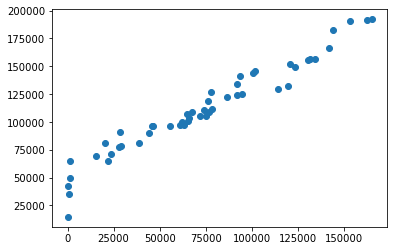

In [36]:
plt.scatter(x='RDS',y='Profit',data=startup_data)

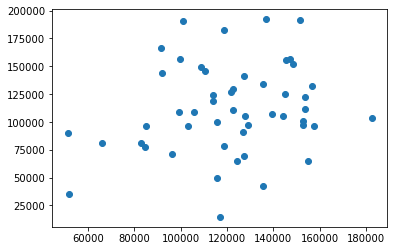

In [37]:
plt.scatter(x='ADMT',y='Profit',data=startup_data)

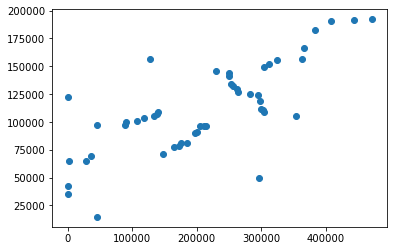

In [38]:
plt.scatter(x='MKSD',y='Profit',data=startup_data)

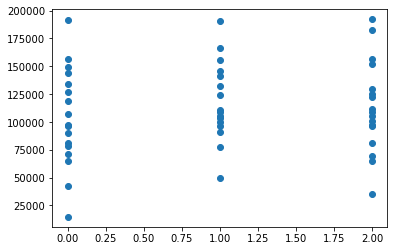

In [39]:
plt.scatter(x='State',y='Profit',data=startup_data)

In [40]:
# Here we see that only the RDS and MKSD matches the  linearity.

In [41]:
startup_data.corr()

,RDS,ADMT,MKSD,State,Profit
RDS,1.000000,0.241955,0.724248,0.104685,0.972900
ADMT,0.241955,1.000000,-0.032154,0.011847,0.200717
MKSD,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [42]:
# Let's check the colinearity with VIF score
import numpy as np

In [43]:
x= np.array(startup_data[['RDS','ADMT','MKSD','State']])
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif=[variance_inflation_factor(x,i) for i in range (x.shape[1])]
print(vif)

[8.386322337836244, 4.815915745674518, 7.674607839106836, 2.382637006599466]


In [44]:
# Here we see that according to the vif score the input features are not very much corealted....

# Model Building

In [45]:
x=startup_data.loc[:,'RDS':'State']
y=startup_data['Profit']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [47]:
x_train.shape

(40, 4)

In [48]:
x_test.shape

(10, 4)

In [49]:
lr=LinearRegression()

# Model Training

In [50]:
lr.fit(x_train,y_train)

LinearRegression()

# Model Testing

In [51]:
y_pred=lr.predict(x_train)

# Model Evaluation 
 ##### To check my model's acuracy

In [52]:
from sklearn.metrics import mean_squared_error,r2_score

In [53]:
print('MSE :',mean_squared_error(y_train,y_pred))
print('R2Score :',r2_score(y_train,y_pred))

MSE : 80081725.0151037
R2Score : 0.9424153873982086


In [54]:
# Testing Accuracy
####### MSE : 79447889.4764007
####### R2Score : 0.9649827631091706
    # Training Accuracy
####### MSE : 80081725.0151037
####### R2Score : 0.9424153873982086

# Model Optimization

In [55]:
import statsmodels.formula.api as smf

In [56]:
model=smf.ols('Profit~RDS+ADMT+MKSD+State',data=startup_data).fit()

In [57]:
model.params

Intercept    50142.506443
RDS              0.805760
ADMT            -0.026826
MKSD             0.027228
State          -22.320577
dtype: float64

In [58]:
model.pvalues

Intercept    2.900008e-09
RDS          8.249206e-22
ADMT         6.056771e-01
MKSD         1.086131e-01
State        9.889988e-01
dtype: float64

In [59]:
# Let's construct miltiple models in order to get the best accuracy score

In [64]:
model_2=smf.ols('Profit~ADMT+MKSD+State',data=startup_data).fit()

In [68]:
model_2.pvalues

Intercept    3.137147e-01
ADMT         1.860240e-02
MKSD         1.777616e-10
State        6.606341e-01
dtype: float64

model_3=smf.ols('Profit~RDS+MKSD+State',data=startup_data).fit()

In [69]:
model_3.pvalues

Intercept    8.270545e-20
RDS          2.013984e-23
MKSD         6.284954e-02
State        9.946539e-01
dtype: float64

In [66]:
model_4=smf.ols('Profit~RDS+ADMT+State',data=startup_data).fit()

In [70]:
model_4.pvalues

Intercept    2.220841e-11
RDS          1.253159e-30
ADMT         2.940797e-01
State        9.870046e-01
dtype: float64

In [67]:
model_5=smf.ols('Profit~RDS+ADMT+MKSD',data=startup_data).fit()

In [71]:
model_5.pvalues

Intercept    1.057379e-09
RDS          2.634968e-22
ADMT         6.017551e-01
MKSD         1.047168e-01
dtype: float64

In [72]:
# Checking my optimized model accuracy by evaluation metrics

In [73]:
model.aic,model.rsquared

(1060.7712849964787, 0.9507462044842656)

In [74]:
model_2.aic,model_2.rsquared

(1162.0529996217995, 0.6113727245607465)

In [75]:
model_3.aic,model_3.rsquared

(1059.0707228589933, 0.9504503504444918)

In [76]:
model_4.aic,model_4.rsquared

(1061.663401933727, 0.9478132427746072)

In [77]:
model_5.aic,model_5.rsquared

(1058.7714985998055, 0.9507459940683246)

# Interpretation
#### With respect to LinearRegression our model leads to overfitting problem where our test accuracy is greayer than our train accuracy
###### so we rely on statsmodel where we see that model_5 is giving the less aic value with 95% of accuracy....